In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import boston_housing

In [3]:
(train_set_x, train_set_y), (test_set_x, test_set_y) = boston_housing.load_data()

In [4]:
train_set_x.shape

(404, 13)

In [5]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_set_x)

MinMaxScaler()

In [6]:
train_set_x = min_max_scaler.fit_transform(train_set_x)
test_set_x = min_max_scaler.fit_transform(test_set_x)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential(name = 'ANN_Boston_Housing_price_pred')
model.add(Dense(200, input_dim = train_set_x.shape[1], activation = 'relu', name = 'Input_layer'))
model.add(Dense(150, activation = 'relu', name = 'Hidden_layer_1'))
model.add(Dense(100, activation = 'relu', name = 'Hidden_layer_2'))
model.add(Dense(50, activation = 'relu', name = 'Hidden_layer_3'))
model.add(Dense(1, activation = 'linear', name = 'Output_layer'))

In [9]:
model.compile(optimizer='Adam', loss = 'mse', metrics=['mae'])

In [10]:
model.summary()

Model: "ANN_Boston_Housing_price_pred"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 200)               2800      
                                                                 
 Hidden_layer_1 (Dense)      (None, 150)               30150     
                                                                 
 Hidden_layer_2 (Dense)      (None, 100)               15100     
                                                                 
 Hidden_layer_3 (Dense)      (None, 50)                5050      
                                                                 
 Output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 53,151
Trainable params: 53,151
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = model.fit(train_set_x, train_set_y, batch_size=40, epochs=100, validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 553.7855 - mae: 21.6596 - val_loss: 586.7547 - val_mae: 22.3817
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 469.6129 - mae: 19.5031 - val_loss: 414.9258 - val_mae: 17.9932
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 252.4326 - mae: 12.7293 - val_loss: 132.9341 - val_mae: 9.2023
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 138.6349 - mae: 9.3617 - val_loss: 106.5844 - val_mae: 8.1353
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 96.2420 - mae: 7.5183 - val_loss: 94.6317 - val_mae: 7.2228
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 76.0451 - mae: 6.2735 - val_loss: 66.6320 - val_mae: 5.9699
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 62.0844 - mae: 6.1496 - val_loss: 54.3637 - val_mae: 5.4922
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss

In [12]:
hist.history

{'loss': [553.7855224609375,
  469.61285400390625,
  252.43258666992188,
  138.6349334716797,
  96.24198150634766,
  76.04512786865234,
  62.084415435791016,
  50.05029296875,
  45.12859344482422,
  41.62647247314453,
  38.849910736083984,
  36.644866943359375,
  34.641754150390625,
  30.92591667175293,
  29.727245330810547,
  26.856332778930664,
  26.970495223999023,
  24.413137435913086,
  23.07102394104004,
  22.29412078857422,
  21.199478149414062,
  20.50734519958496,
  20.1667537689209,
  18.55924415588379,
  18.86983871459961,
  17.764671325683594,
  17.62134552001953,
  16.93352699279785,
  16.928491592407227,
  16.88331413269043,
  16.679731369018555,
  16.078081130981445,
  17.45855140686035,
  15.896709442138672,
  15.237663269042969,
  14.573291778564453,
  14.157175064086914,
  14.70545768737793,
  15.304121971130371,
  13.320255279541016,
  13.360860824584961,
  12.870349884033203,
  12.705804824829102,
  13.61787223815918,
  13.199533462524414,
  12.972576141357422,
  11

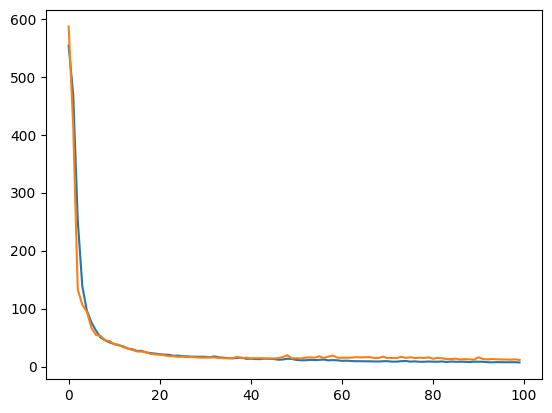

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

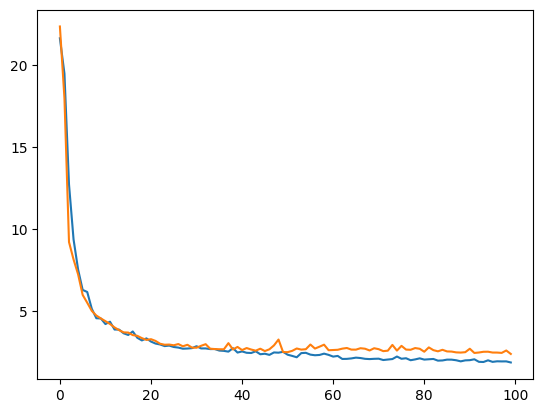

In [14]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])

In [15]:
from ann_visualizer.visualize import ann_viz

In [16]:
ann_viz(model, filename='filename.gv')

In [17]:
import graphviz

In [18]:
viz = graphviz.Source.from_file('filename.gv')

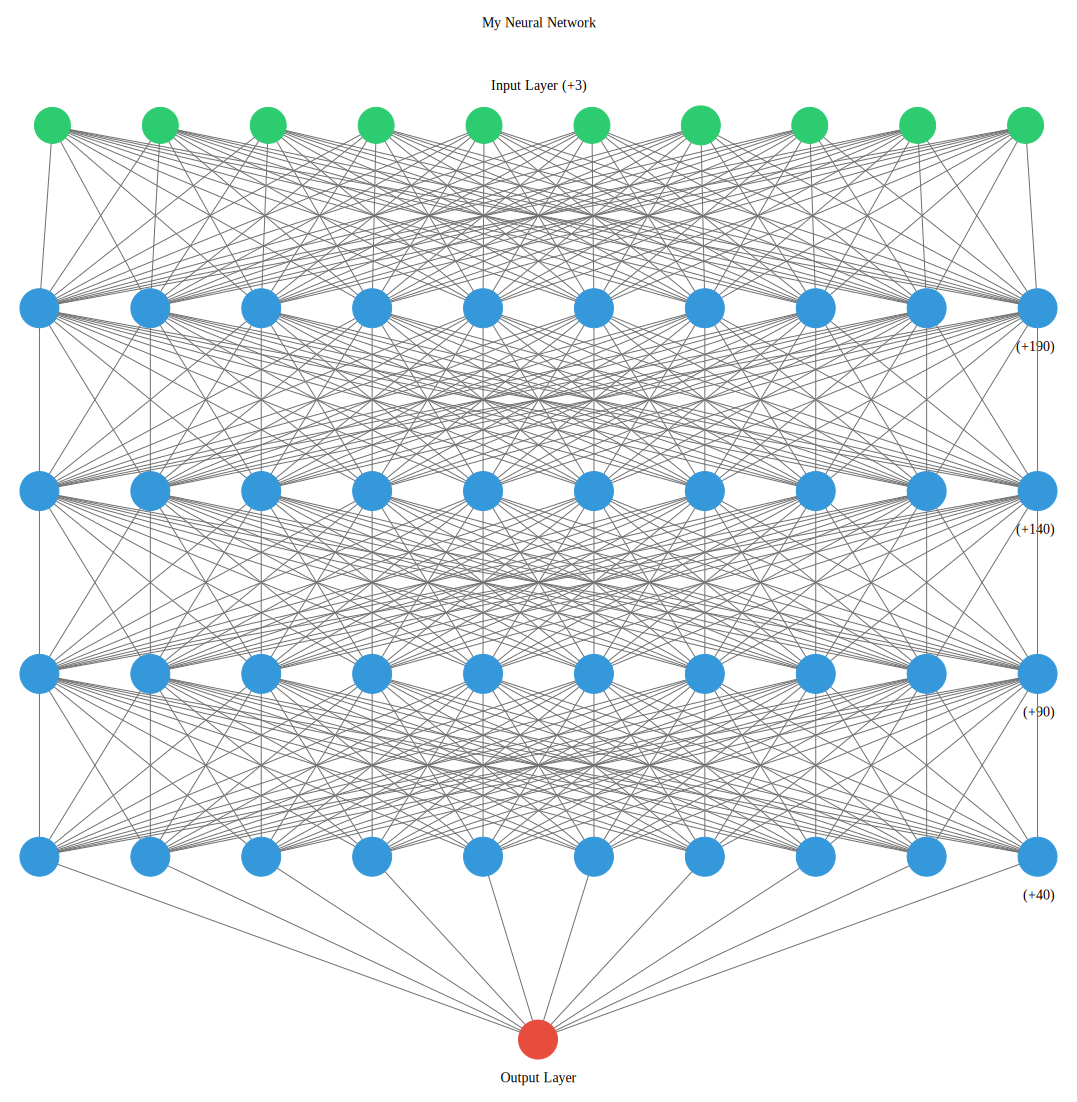

In [19]:
viz

In [20]:
test_results = model.evaluate(test_set_x, test_set_y)

4/4 [==============================] - 0s 3ms/step - loss: 39.4155 - mae: 4.9049


In [21]:
predicted_results = model.predict(test_set_x)

4/4 [==============================] - 0s 3ms/step


In [22]:
for i in range(len(predicted_results)):
  print(f"Predicted: {predicted_results[i]}, Actual: {test_set_y[i]}")

Predicted: [6.1958203], Actual: 7.2
Predicted: [15.8490505], Actual: 18.8
Predicted: [17.944332], Actual: 19.0
Predicted: [27.053726], Actual: 27.0
Predicted: [20.152061], Actual: 22.2
Predicted: [16.819794], Actual: 24.5
Predicted: [24.371775], Actual: 31.2
Predicted: [18.588459], Actual: 22.9
Predicted: [16.19031], Actual: 20.5
Predicted: [16.594704], Actual: 23.2
Predicted: [10.97484], Actual: 18.6
Predicted: [14.140938], Actual: 14.5
Predicted: [14.600967], Actual: 17.8
Predicted: [37.72186], Actual: 50.0
Predicted: [12.382934], Actual: 20.8
Predicted: [16.53486], Actual: 24.3
Predicted: [22.544737], Actual: 24.2
Predicted: [17.964333], Actual: 19.8
Predicted: [13.584579], Actual: 19.1
Predicted: [28.39877], Actual: 22.7
Predicted: [7.6143723], Actual: 12.0
Predicted: [9.819311], Actual: 10.2
Predicted: [16.814577], Actual: 20.0
Predicted: [12.638902], Actual: 18.5
Predicted: [16.231184], Actual: 20.9
Predicted: [18.135096], Actual: 23.0
Predicted: [27.22124], Actual: 27.5
Predicte